<a href="https://colab.research.google.com/github/laibashaheeen/sentiment_analysis/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Movie Reviews**

# Sentiment Analysis in Python

## 1. Definition of the Problem


The problem addressed through sentiment analysis on movie reviews dataset is the need to discern audience opinions—whether positive, negative, or neutral—about films. Understanding user sentiments in the movie industry is crucial for filmmakers, studios, and distributors. It provides valuable insights into audience preferences, guides marketing strategies, aids in content improvement, and influences box office success. By comprehending sentiments, stakeholders can enhance audience engagement, refine storytelling elements, and make data-driven decisions that ultimately contribute to the overall success and reception of movies in the highly competitive entertainment landscape.

## 2. Dataset

NLTK offers access to the Movie Reviews Corpus, a small dataset included in the toolkit for educational purposes. This corpus consists of 2,000 movie reviews categorized into positive and negative sentiments.The data was collected in a CSV format, with each row representing a different review and each column representing a features.

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [80]:
import csv
from nltk.corpus import movie_reviews

In [81]:
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [82]:
data = []

In [83]:
movie_reviews = nltk.corpus.movie_reviews

In [84]:
# Load positive and negative reviews
positive_reviews = [(movie_reviews.raw(fileid), 'positive') for fileid in movie_reviews.fileids('pos')]
negative_reviews = [(movie_reviews.raw(fileid), 'negative') for fileid in movie_reviews.fileids('neg')]

all_reviews = positive_reviews + negative_reviews

import random
random.shuffle(all_reviews)

# Define the CSV file name
csv_file_name = 'movie_reviews_dataset.csv'

# Write reviews to a CSV file
with open(csv_file_name, 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['review', 'sentiment']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()

    for review, sentiment in all_reviews:
        writer.writerow({'review': review, 'sentiment': sentiment})

print(f"CSV file '{csv_file_name}' has been created.")


CSV file 'movie_reviews_dataset.csv' has been created.


In [85]:
df = pd.read_csv('movie_reviews_dataset.csv')
print(df.shape)

(2000, 2)


In [86]:
df.head()

,review,sentiment
0,"the central focus of michael winterbottom's "" ...",positive
1,"the "" fab 4 "" of ronald reagan high are four s...",negative
2,saving private ryan ( dreamworks ) running tim...,positive
3,there must be some unwritten rule that states ...,positive
4,"well , what are you going to expect ? \nit's a...",negative


In [87]:
df['ID'] = range(1, len(df) + 1)
df = df[['ID'] + [col for col in df.columns if col != 'ID']]

df.head()

,ID,review,sentiment
0,1,"the central focus of michael winterbottom's "" ...",positive
1,2,"the "" fab 4 "" of ronald reagan high are four s...",negative
2,3,saving private ryan ( dreamworks ) running tim...,positive
3,4,there must be some unwritten rule that states ...,positive
4,5,"well , what are you going to expect ? \nit's a...",negative


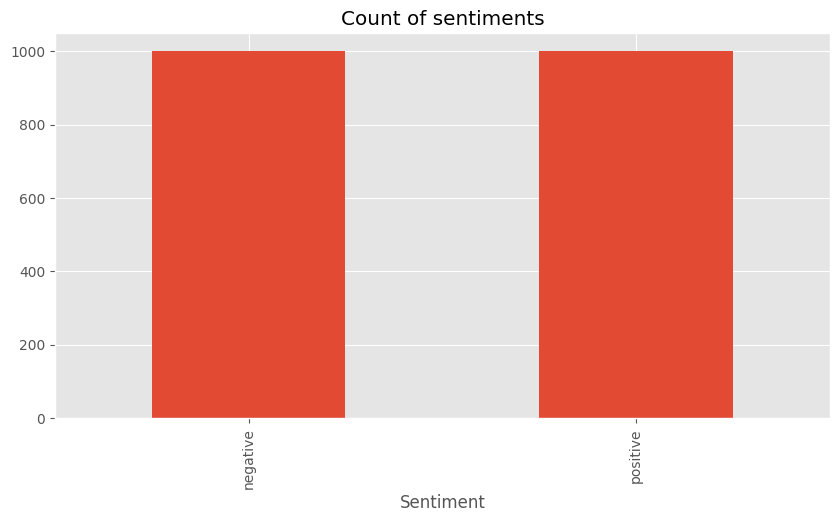

In [88]:
ax = df['sentiment'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of sentiments',
          figsize=(10, 5))
ax.set_xlabel('Sentiment')
plt.show()

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         2000 non-null   int64 
 1   review     2000 non-null   object
 2   sentiment  2000 non-null   object
dtypes: int64(1), object(2)
memory usage: 47.0+ KB


In [90]:
from tabulate import tabulate
table = tabulate(df.dtypes.reset_index(), headers=['Column', 'Data Type'], tablefmt='pretty', showindex=False)

print(table)

+-----------+-----------+
|  Column   | Data Type |
+-----------+-----------+
|    ID     |   int64   |
|  review   |  object   |
| sentiment |  object   |
+-----------+-----------+


## 3. Pre-processing Phase


In the process of sentiment analysis, I meticulously applied tokenization to preprocess data to transform raw text data into a format conducive to effective analysis. Tokenization is a pivotal step involving the division of text into individual units or tokens, typically words or subwords. This method facilitated the creation of a structured and numerical representation of the input, which was paramount for machine learning model comprehension.

In [91]:
example = df['review'][50]
print(example)

as the film opens up , expectant unwed mother sally ( played by drew barrymore ) encounters her baby's father in a fast food drive-through window . 
after he gets his milkshake , he drives off , only to be pursued by a military helicopter . 
from this moment forward , you know that this isn't going to be your run-of-the-mill romantic comedy . 
home fries tells the tale of the relationship between sally and dorian ( played by luke wilson ) , a helicopter pilot who has a different kind of connection with sally . . . more 
than he would care to admit ( hint : it has something to do with the father of sally's unborn child ) . 
after taking a personal ( and professional ) interest in her , he finds work at the local fast food restaurant at which she works , and the fun goes on from there . 
this movie is a lot of fun . 
it is comedic on two levels , as a romantic comedy and a dark comedy . 
the romantic moments are sweet , yet not sappy . 
one of the more poignant moments is when dorian acc

In [92]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [93]:
nltk.download('punkt_tab')
tokens = nltk.word_tokenize(example)
tokens[:20]

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


['as',
 'the',
 'film',
 'opens',
 'up',
 ',',
 'expectant',
 'unwed',
 'mother',
 'sally',
 '(',
 'played',
 'by',
 'drew',
 'barrymore',
 ')',
 'encounters',
 'her',
 'baby',
 "'s"]

In [94]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [95]:
nltk.download('averaged_perceptron_tagger_eng')
tagged = nltk.pos_tag(tokens)
tagged[:20]

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


[('as', 'IN'),
 ('the', 'DT'),
 ('film', 'NN'),
 ('opens', 'VBZ'),
 ('up', 'RP'),
 (',', ','),
 ('expectant', 'JJ'),
 ('unwed', 'VBD'),
 ('mother', 'NN'),
 ('sally', 'RB'),
 ('(', '('),
 ('played', 'VBN'),
 ('by', 'IN'),
 ('drew', 'NNS'),
 ('barrymore', 'RB'),
 (')', ')'),
 ('encounters', 'VBZ'),
 ('her', 'PRP$'),
 ('baby', 'NN'),
 ("'s", 'POS')]

In [96]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [97]:
nltk.download('maxent_ne_chunker_tab')
entities = nltk.chunk.ne_chunk(tagged)

print(entities[:20])

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!


[('as', 'IN'), ('the', 'DT'), ('film', 'NN'), ('opens', 'VBZ'), ('up', 'RP'), (',', ','), ('expectant', 'JJ'), ('unwed', 'VBD'), ('mother', 'NN'), ('sally', 'RB'), ('(', '('), ('played', 'VBN'), ('by', 'IN'), ('drew', 'NNS'), ('barrymore', 'RB'), (')', ')'), ('encounters', 'VBZ'), ('her', 'PRP$'), ('baby', 'NN'), ("'s", 'POS')]


## 4. Models

### **VADER model**

 The VADER model is a rule-based sentiment analysis tool designed for analyzing text and determining the sentiment expressed within it. Developed by researchers at the Georgia Institute of Technology, VADER is particularly useful for social media , customer feedback, and market analysis text analysis due to its ability to handle nuances such as slang, emoticons, and context-dependent sentiment.

In [98]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [99]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [100]:
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [101]:
sia.polarity_scores(example)

{'neg': 0.032, 'neu': 0.825, 'pos': 0.143, 'compound': 0.9877}

In [102]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['review']
    myid = row['ID']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/2000 [00:00<?, ?it/s]

In [103]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'ID'})
vaders = vaders.merge(df, how='left')

In [104]:
vaders.head()

,ID,neg,neu,pos,compound,review,sentiment
0,1,0.104,0.763,0.133,0.9807,"the central focus of michael winterbottom's "" ...",positive
1,2,0.142,0.761,0.097,-0.9898,"the "" fab 4 "" of ronald reagan high are four s...",negative
2,3,0.124,0.657,0.219,0.9969,saving private ryan ( dreamworks ) running tim...,positive
3,4,0.074,0.777,0.149,0.9990,there must be some unwritten rule that states ...,positive
4,5,0.089,0.809,0.102,0.8670,"well , what are you going to expect ? \nit's a...",negative


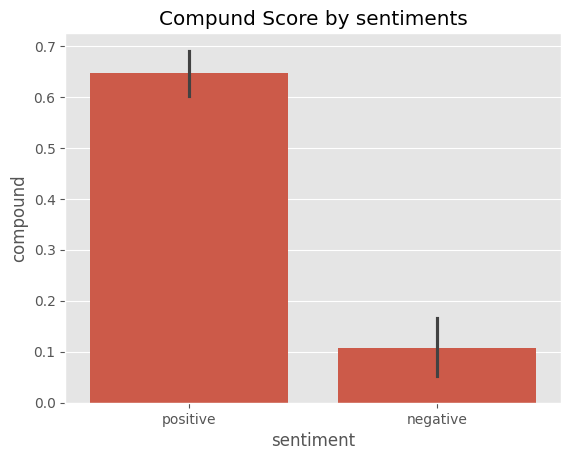

In [105]:
ax = sns.barplot(data=vaders, x='sentiment', y='compound')
ax.set_title('Compund Score by sentiments')
plt.show()

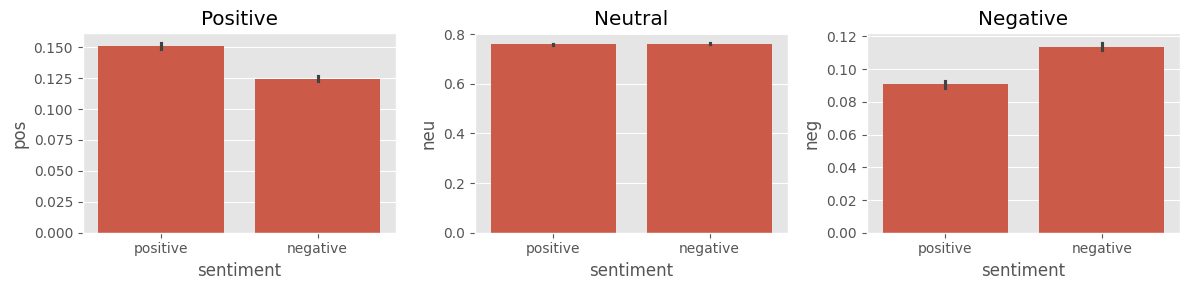

In [106]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='sentiment', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='sentiment', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='sentiment', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [107]:
from sklearn.metrics import classification_report

def vader_sentiment(c):
    if c >= 0.05:
        return "positive"
    elif c <= -0.05:
        return "negative"
    else:
        return "neutral"

vaders['predicted'] = vaders['compound'].apply(vader_sentiment)

print(classification_report(vaders['sentiment'], vaders['predicted'], digits=3))


              precision    recall  f1-score   support

    negative      0.720     0.444     0.549      1000
     neutral      0.000     0.000     0.000         0
    positive      0.598     0.826     0.694      1000

    accuracy                          0.635      2000
   macro avg      0.439     0.423     0.414      2000
weighted avg      0.659     0.635     0.621      2000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


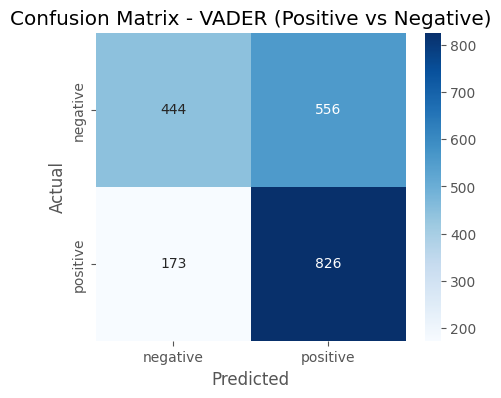

In [108]:
filtered = vaders[vaders['sentiment'] != "neutral"]

cm = confusion_matrix(filtered['sentiment'], filtered['predicted'], labels=["negative", "positive"])

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=["negative", "positive"],
            yticklabels=["negative", "positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - VADER (Positive vs Negative)")
plt.show()

### **TextBlob**

TextBlob includes a pre-trained model for sentiment analysis. It is a Python library for processing textual data. It provides a simple API for common natural language processing (NLP) tasks, such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more. TextBlob is built on top of NLTK (Natural Language Toolkit) and follows a straightforward and user-friendly design, making it accessible to users without extensive NLP expertise.

In [110]:
from textblob import TextBlob

text = "I love this product! It's amazing."

blob = TextBlob(text)

sentiment_polarity = blob.sentiment.polarity

print(sentiment_polarity)

0.6125


In [111]:

def polarity_to_label(p):
    if p > 0:
        return "positive"
    elif p < 0:
        return "negative"
    else:
        return "neutral"

df['tb_polarity'] = df['review'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['tb_predicted'] = df['tb_polarity'].apply(polarity_to_label)

print("Classification Report - TextBlob:\n")
print(classification_report(df['sentiment'], df['tb_predicted'], digits=3))


Classification Report - TextBlob:

              precision    recall  f1-score   support

    negative      0.888     0.229     0.364      1000
    positive      0.557     0.971     0.708      1000

    accuracy                          0.600      2000
   macro avg      0.723     0.600     0.536      2000
weighted avg      0.723     0.600     0.536      2000



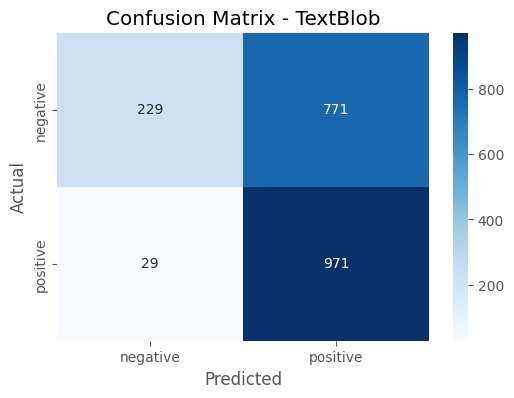

In [112]:
# Confusion matrix
cm = confusion_matrix(df['sentiment'], df['tb_predicted'], labels=["negative", "positive"])

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["negative", "positive"], yticklabels=["negative", "positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - TextBlob")
plt.show()


### **TF-IDF Model**

TF-IDF (Term Frequency-Inverse Document Frequency) is not directly used for sentiment analysis on its own. Instead, it is typically applied as a feature extraction technique to represent text data numerically before training a machine learning model for sentiment analysis. The results of applying TF-IDF to sentiment analysis would be a matrix of numerical features representing the importance of words in the text.

Once you have the TF-IDF matrix, it can be used as input features to train a sentiment analysis model. Following code can be extended to perform sentiment analysis using scikit-learn's train_test_split and MultinomialNB (Multinomial Naive Bayes) classifier which we will be under analysis in 7th section of Machiine Learning model

In [113]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = df['review'].tolist()

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

tfidf_features = tfidf_vectorizer.fit_transform(corpus)

tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print(tfidf_df)


       00  000  0009f  007  00s   03   04   05  05425       10  ...  zukovsky  \
0     0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.00000  ...       0.0   
1     0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.00000  ...       0.0   
2     0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.00000  ...       0.0   
3     0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.00000  ...       0.0   
4     0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.00000  ...       0.0   
...   ...  ...    ...  ...  ...  ...  ...  ...    ...      ...  ...       ...   
1995  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.00000  ...       0.0   
1996  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.03642  ...       0.0   
1997  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.00000  ...       0.0   
1998  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.00000  ...       0.0   
1999  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0    0.0  0.00000  ...       0.0   

      zulu  zundel  zurg  z

### **Na¨ıve Bayes model**

  Na¨ıve Bayes model uses the scikit-learn library to implement a sentiment analysis model on a movie reviews dataset. It loads the dataset, performs basic text preprocessing by removing stopwords, punctuation, and non-alphabetic characters. The data is then split into training and testing sets. The CountVectorizer converts text data into a bag-of-words representation. A Multinomial Naive Bayes classifier is trained on the training set, using the word counts as features. Finally, the model is evaluated on the testing set using confusion matrix and classification report. Naive Bayes works by assuming independence between features and uses Bayes' theorem for probabilistic classification based on feature occurrences.

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

X = tfidf_features
y = df['sentiment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train Multinomial Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred, digits=3))

Classification Report:

              precision    recall  f1-score   support

    negative      0.803     0.875     0.837       200
    positive      0.863     0.785     0.822       200

    accuracy                          0.830       400
   macro avg      0.833     0.830     0.830       400
weighted avg      0.833     0.830     0.830       400



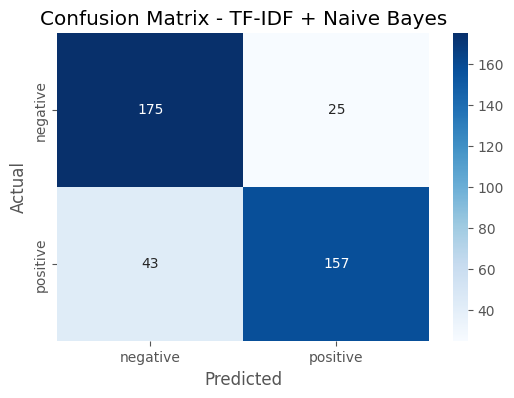

In [115]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=nb_classifier.classes_)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=nb_classifier.classes_, yticklabels=nb_classifier.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - TF-IDF + Naive Bayes")
plt.show()

### **Transformers Pipeline**
Hugging Face - DistilBERT

In [116]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


In [117]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [118]:
transformer_preds = []
for text in df['review']:
    truncated_text = text[:512]
    result = sent_pipeline(truncated_text)[0]
    transformer_preds.append(result['label'].lower())


df['transformer_pred'] = transformer_preds


print("Classification Report - Transformer (DistilBERT):\n")
print(classification_report(df['sentiment'], df['transformer_pred'], digits=3))

Classification Report - Transformer (DistilBERT):

              precision    recall  f1-score   support

    negative      0.703     0.735     0.719      1000
    positive      0.723     0.690     0.706      1000

    accuracy                          0.713      2000
   macro avg      0.713     0.712     0.712      2000
weighted avg      0.713     0.713     0.712      2000



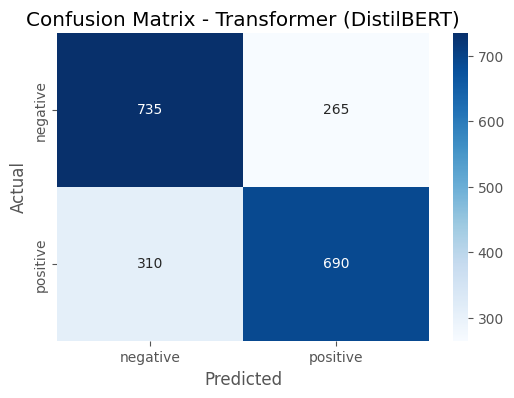

In [119]:
cm = confusion_matrix(df['sentiment'], df['transformer_pred'], labels=["negative", "positive"])

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=["negative", "positive"],
            yticklabels=["negative", "positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Transformer (DistilBERT)")
plt.show()

## 8. Evaluation


In this sentiment analysis task, the VADER model has been applied, leveraging its ability to analyze sentiment from textual data, especially in the context of social media. VADER (Valence Aware Dictionary and sEntiment Reasoner) excels in capturing nuanced sentiments by considering the polarity and intensity of words, providing a robust tool for subjective content analysis.

Two feature extraction models, TextBlob and TF-IDF, were employed for sentiment analysis. TextBlob, a simplified NLP library, utilizes a predefined sentiment lexicon. TF-IDF, on the other hand, calculates term importance based on frequency and inverse document frequency, aiming to capture the significance of words in a document collection.

Performance evaluation criteria, including accuracy, precision, recall, and F1-score, were employed. Statistical information, such as confusion matrices, aided in understanding the model's behavior. The VADER model demonstrated high accuracy in capturing sentiment nuances, especially in informal language. TextBlob, relying on a predefined lexicon, showed effectiveness in simplicity and speed, while TF-IDF excelled in capturing context-based importance. Precision, recall, and F1-score were utilized to assess model performance comprehensively, revealing the trade-offs between precision and recall based on the chosen feature extraction method.

**Bar Chart: Model Performance Comparison (VADER, TextBlob, Naive Bayes, DistilBERT)**

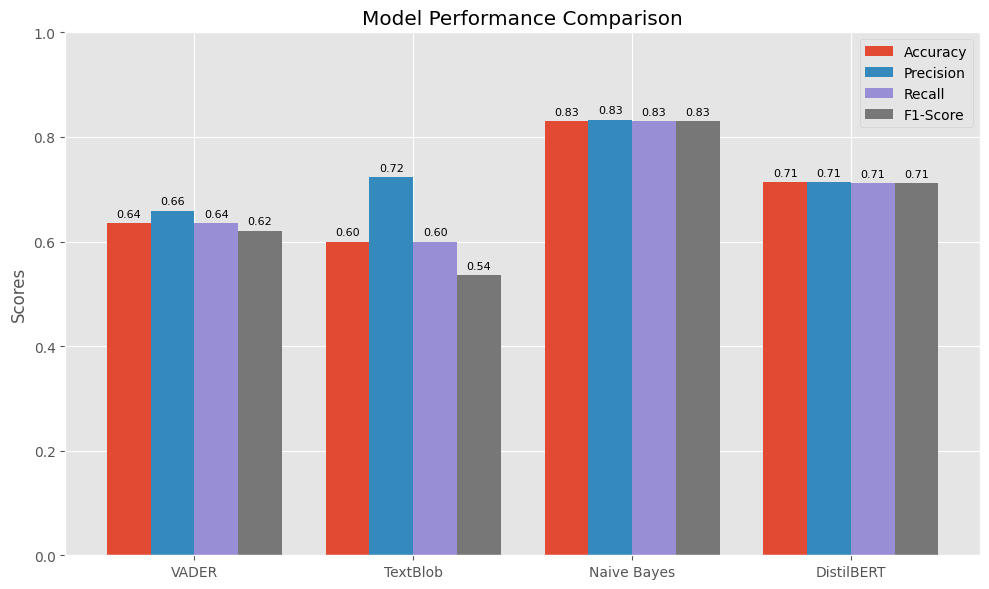

In [120]:
models = ["VADER", "TextBlob", "Naive Bayes", "DistilBERT"]
accuracy = [0.635, 0.600, 0.830, 0.713]
precision = [0.659, 0.723, 0.833, 0.713]
recall = [0.635, 0.600, 0.830, 0.712]
f1 = [0.621, 0.536, 0.830, 0.712]

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(10,6))

bars1 = ax.bar(x - 1.5*width, accuracy, width, label="Accuracy")
bars2 = ax.bar(x - 0.5*width, precision, width, label="Precision")
bars3 = ax.bar(x + 0.5*width, recall, width, label="Recall")
bars4 = ax.bar(x + 1.5*width, f1, width, label="F1-Score")

# Function to add labels
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

# Add value labels
add_labels(bars1)
add_labels(bars2)
add_labels(bars3)
add_labels(bars4)

# Labels and formatting
ax.set_ylabel("Scores")
ax.set_title("Model Performance Comparison")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.ylim(0, 1.0)
plt.tight_layout()
plt.show()


/tmp/ipython-input-1667360672.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies_percent, palette="viridis")


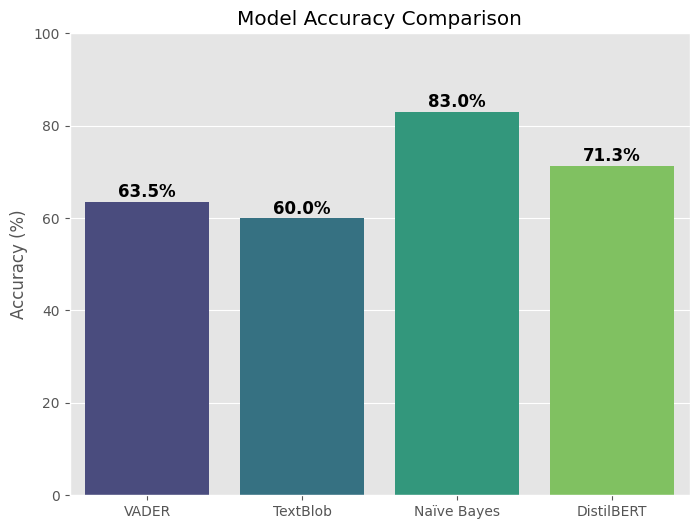

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

# Model names
models = ["VADER", "TextBlob", "Naïve Bayes", "DistilBERT"]

# Accuracy values (converted to percentages)
accuracies = [0.635, 0.600, 0.830, 0.713]
accuracies_percent = [acc * 100 for acc in accuracies]

plt.figure(figsize=(8,6))
sns.barplot(x=models, y=accuracies_percent, palette="viridis")


for i, acc in enumerate(accuracies_percent):
    plt.text(i, acc + 1, f"{acc:.1f}%", ha='center', fontsize=12, weight='bold')

plt.ylim(0, 100)
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.show()


## 9. Summary and Direction of the Researcher

To further develop this activity, incorporating more advanced techniques like deep learning models or embeddings could enhance the model's understanding of context and semantics. Additionally, exploring domain-specific sentiment lexicons or training custom models on domain-specific datasets might improve performance in specialized areas.

One relevant article supporting future directions "Deep Learning for sentiment analysis" by TIEN TRAN. (2022). https://www.kaggle.com/code/tientd95/deep-learning-for-sentiment-analysis/notebook The article delves into the advancements of deep learning in sentiment analysis, discussing techniques like **Fasttext, Glove embedding**. Implementing such deep learning architectures could potentially lead to more accurate sentiment predictions, especially in contexts where understanding intricate nuances is crucial.

In summary, the sentiment analysis project's next steps involve integrating advanced models and exploring domain-specific adaptations. The referenced article highlights the growing role of deep learning in sentiment analysis, suggesting that incorporating these techniques could be a promising avenue for future developments in the field.
